# **Traditional LSTM | Same Day Predictions | Not Normalized**

In [1]:
import numpy  as np
import pandas as pd

## Read In Datasets

* `msftSameDayNotNorm.csv`
* `appleSameDayNotNorm.csv`
* `djiaSameDayNotNorm.csv`

In [2]:
aaplDf = pd.read_csv('appleSameDayNotNorm.csv')
msftDf = pd.read_csv('msftSameDayNotNorm.csv')
djiaDf = pd.read_csv('djiaSameDayNotNorm.csv')

## Drop Attributes That Can't Be Used as Features

In [3]:
# Stock and Sentiment features

aaplDf = aaplDf.drop(columns=['Unnamed: 0'])
msftDf = msftDf.drop(columns=['Unnamed: 0'])
djiaDf = djiaDf.drop(columns=['Unnamed: 0'])

# Only stock Features

# aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])
# msftDf = msftDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])
# djiaDf = djiaDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])

# Only Sentiment 

# aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'Open'])
# msftDf = msftDf.drop(columns=['Unnamed: 0', 'Open'])
# djiaDf = djiaDf.drop(columns=['Unnamed: 0', 'Open'])

In [4]:
#aaplDf.head()
#msftDf.head()
djiaDf.head()

,neg,neu,pos,compound,Open,label
0,0.218,0.705,0.078,-0.9972,12210.12988,1
1,0.212,0.748,0.040,-0.9943,12277.70996,1
2,0.167,0.732,0.101,-0.9728,12286.33984,0
3,0.150,0.770,0.080,-0.9681,12089.62988,1
4,0.188,0.731,0.081,-0.9952,12144.58984,1


## Split into Data (`x`) and Label (`y`) Sets

In [5]:
yAppl = aaplDf['label']
xAppl = aaplDf.drop(columns = ['label'])

yMsft = msftDf['label']
xMsft = msftDf.drop(columns = ['label'])

yDjia = djiaDf['label']
xDjia = djiaDf.drop(columns = ['label'])

## Split into Train and Test Sets

In [6]:
from sklearn.model_selection import train_test_split
# 90 - 10 : Train - Test Split
xTrainAppl, xTestAppl, yTrainAppl, yTestAppl = train_test_split(xAppl, yAppl, test_size=0.1, shuffle = False)
xTrainMsft, xTestMsft, yTrainMsft, yTestMsft = train_test_split(xMsft, yMsft, test_size=0.1, shuffle = False)
xTrainDjia, xTestDjia, yTrainDjia, yTestDjia = train_test_split(xDjia, yDjia, test_size=0.1, shuffle = False)

## Normalize the Data (`x`) Sets Using `MinMaxScaler`

In [7]:
from sklearn.preprocessing import MinMaxScaler

def scaleX(trainX, testX):
    scaler = MinMaxScaler()
    scaler.fit(trainX)
    trainX = scaler.transform(trainX)
    testX  = scaler.transform(testX)
    return trainX, testX

xTrainAppl, xTestAppl = scaleX(xTrainAppl, xTestAppl)
xTrainMsft, xTestMsft = scaleX(xTrainMsft, xTestMsft)
xTrainDjia, xTestDjia = scaleX(xTrainDjia, xTestDjia)

## Convert Label (`y`) Sets to `numpy` arrays

In [8]:
yTrainAppl = np.array(yTrainAppl.values.tolist())
yTestAppl  = np.array(yTestAppl.values.tolist())

yTrainMsft = np.array(yTrainMsft.values.tolist())
yTestMsft  = np.array(yTestMsft.values.tolist())

yTrainDjia = np.array(yTrainDjia.values.tolist())
yTestDjia  = np.array(yTestDjia.values.tolist())

## Reshape Data(`x`) Sets Using `numpy`

In [9]:
xTrainAppl = np.reshape(xTrainAppl, (len(xTrainAppl) , 1 , xTrainAppl.shape[1]) ) # 5 because there are 5 features
xTestAppl  = np.reshape(xTestAppl,  (len(xTestAppl)  , 1 , xTestAppl.shape[1]) ) # 5 because there are 5 features

xTrainMsft = np.reshape(xTrainMsft, (len(xTrainMsft) , 1 , xTrainMsft.shape[1]) ) # 5 because there are 5 features
xTestMsft  = np.reshape(xTestMsft,  (len(xTestMsft)  , 1 , xTestMsft.shape[1]) ) # 5 because there are 5 features

xTrainDjia = np.reshape(xTrainDjia, (len(xTrainDjia) , 1 , xTrainDjia.shape[1]) ) # 5 because there are 5 features
xTestDjia  = np.reshape(xTestDjia,  (len(xTestDjia)  , 1 , xTestDjia.shape[1]) ) # 5 because there are 5 features

## Traditional LSTM

In [10]:
import tensorflow   as     tf
from   tensorflow   import keras
from   keras        import Sequential
from   keras.layers import Dense
from   keras.layers import LSTM
from   keras.layers import Dropout

In [11]:
def makeLSTM(xTrain):
    model = Sequential()
    model.add (LSTM  (units = 50, activation = 'relu', input_shape = (xTrain.shape[1], xTrain.shape[2]), return_sequences=True)) # input_shape = (n_steps, n_features)
#     model.add(Dropout(0.25))
    model.add (LSTM  (units = 25, activation = 'relu', return_sequences=True)) # input_shape = (n_steps, n_features)
#     model.add(Dropout(0.25))
    model.add (Dense (units = 1, activation = 'sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model

### Make LSTM for Each Set

In [12]:
applLSTM = makeLSTM(xTrainAppl)
msftLSTM = makeLSTM(xTrainMsft)
djiaLSTM = makeLSTM(xTrainDjia)

### Fit Model for Each Set

In [13]:
applHist = applLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftHist = msftLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)
djiaHist = applLSTM.fit(xTrainDjia, yTrainDjia, batch_size = 72, validation_data=(xTestDjia, yTestDjia), epochs = 500, shuffle=False)

Epoch 1/500
30/30 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.4761 - val_loss: 0.6932 - val_accuracy: 0.4721
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4952 - val_loss: 0.6932 - val_accuracy: 0.4549
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.4549
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4549
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4549
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4976 - val_loss: 0.6933 - val_accuracy: 0.4549
Epoch 7/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6933 - val_accuracy: 0.4549
Epoch 8/500


Epoch 59/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5134 - val_loss: 0.7056 - val_accuracy: 0.5064
Epoch 60/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5115 - val_loss: 0.7061 - val_accuracy: 0.5064
Epoch 61/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5163 - val_loss: 0.7059 - val_accuracy: 0.5064
Epoch 62/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5139 - val_loss: 0.7060 - val_accuracy: 0.5107
Epoch 63/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5177 - val_loss: 0.7059 - val_accuracy: 0.5150
Epoch 64/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5206 - val_loss: 0.7062 - val_accuracy: 0.5193
Epoch 65/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5196 - val_loss: 0.7056 - val_accuracy: 0.5064
Epoch 

30/30 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5469 - val_loss: 0.7050 - val_accuracy: 0.5408
Epoch 117/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5435 - val_loss: 0.7040 - val_accuracy: 0.5494
Epoch 118/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5469 - val_loss: 0.7042 - val_accuracy: 0.5451
Epoch 119/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5416 - val_loss: 0.7045 - val_accuracy: 0.5536
Epoch 120/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5459 - val_loss: 0.7046 - val_accuracy: 0.5494
Epoch 121/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5502 - val_loss: 0.7046 - val_accuracy: 0.5579
Epoch 122/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5522 - val_loss: 0.7042 - val_accuracy: 0.5579
Epoch 123/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5560 - val_loss: 0.7047 - val_accuracy: 0.5494
Epoch 174/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5579 - val_loss: 0.7042 - val_accuracy: 0.5494
Epoch 175/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5574 - val_loss: 0.7045 - val_accuracy: 0.5579
Epoch 176/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5574 - val_loss: 0.7042 - val_accuracy: 0.5536
Epoch 177/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5569 - val_loss: 0.7047 - val_accuracy: 0.5536
Epoch 178/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5598 - val_loss: 0.7040 - val_accuracy: 0.5536
Epoch 179/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5612 - val_loss: 0.7048 - val_accuracy: 0.5536
Epoch 180/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5636 - val_loss: 0.7066 - val_accuracy: 0.5536
Epoch 231/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5641 - val_loss: 0.7066 - val_accuracy: 0.5494
Epoch 232/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5684 - val_loss: 0.7065 - val_accuracy: 0.5451
Epoch 233/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5627 - val_loss: 0.7066 - val_accuracy: 0.5408
Epoch 234/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5656 - val_loss: 0.7065 - val_accuracy: 0.5622
Epoch 235/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5646 - val_loss: 0.7066 - val_accuracy: 0.5365
Epoch 236/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5670 - val_loss: 0.7066 - val_accuracy: 0.5579
Epoch 237/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5684 - val_loss: 0.7079 - val_accuracy: 0.5408
Epoch 288/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5675 - val_loss: 0.7085 - val_accuracy: 0.5408
Epoch 289/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5684 - val_loss: 0.7084 - val_accuracy: 0.5408
Epoch 290/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5670 - val_loss: 0.7083 - val_accuracy: 0.5408
Epoch 291/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5670 - val_loss: 0.7083 - val_accuracy: 0.5408
Epoch 292/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5689 - val_loss: 0.7080 - val_accuracy: 0.5279
Epoch 293/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5656 - val_loss: 0.7083 - val_accuracy: 0.5322
Epoch 294/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5684 - val_loss: 0.7089 - val_accuracy: 0.5322
Epoch 345/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5694 - val_loss: 0.7084 - val_accuracy: 0.5279
Epoch 346/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5703 - val_loss: 0.7082 - val_accuracy: 0.5322
Epoch 347/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5689 - val_loss: 0.7080 - val_accuracy: 0.5322
Epoch 348/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5689 - val_loss: 0.7084 - val_accuracy: 0.5193
Epoch 349/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5689 - val_loss: 0.7090 - val_accuracy: 0.5279
Epoch 350/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5627 - val_loss: 0.7087 - val_accuracy: 0.5365
Epoch 351/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5684 - val_loss: 0.7084 - val_accuracy: 0.5408
Epoch 402/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5684 - val_loss: 0.7087 - val_accuracy: 0.5408
Epoch 403/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5689 - val_loss: 0.7085 - val_accuracy: 0.5365
Epoch 404/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5694 - val_loss: 0.7081 - val_accuracy: 0.5322
Epoch 405/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5703 - val_loss: 0.7087 - val_accuracy: 0.5365
Epoch 406/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5703 - val_loss: 0.7082 - val_accuracy: 0.5408
Epoch 407/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5699 - val_loss: 0.7082 - val_accuracy: 0.5279
Epoch 408/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5727 - val_loss: 0.7088 - val_accuracy: 0.5322
Epoch 459/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5703 - val_loss: 0.7084 - val_accuracy: 0.5322
Epoch 460/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5703 - val_loss: 0.7088 - val_accuracy: 0.5279
Epoch 461/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5679 - val_loss: 0.7088 - val_accuracy: 0.5322
Epoch 462/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5703 - val_loss: 0.7089 - val_accuracy: 0.5322
Epoch 463/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5699 - val_loss: 0.7091 - val_accuracy: 0.5365
Epoch 464/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5718 - val_loss: 0.7088 - val_accuracy: 0.5279
Epoch 465/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5141 - val_loss: 0.6925 - val_accuracy: 0.5185
Epoch 16/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5141 - val_loss: 0.6925 - val_accuracy: 0.5185
Epoch 17/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5141 - val_loss: 0.6925 - val_accuracy: 0.5185
Epoch 18/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5141 - val_loss: 0.6925 - val_accuracy: 0.5185
Epoch 19/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5141 - val_loss: 0.6925 - val_accuracy: 0.5185
Epoch 20/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5141 - val_loss: 0.6925 - val_accuracy: 0.5185
Epoch 21/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5141 - val_loss: 0.6925 - val_accuracy: 0.5185
Epoch 22/500
17/17 

Epoch 73/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5381 - val_loss: 0.7038 - val_accuracy: 0.4963
Epoch 74/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5398 - val_loss: 0.7045 - val_accuracy: 0.4963
Epoch 75/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5448 - val_loss: 0.7051 - val_accuracy: 0.4963
Epoch 76/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5423 - val_loss: 0.7059 - val_accuracy: 0.4963
Epoch 77/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5448 - val_loss: 0.7068 - val_accuracy: 0.4963
Epoch 78/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5473 - val_loss: 0.7076 - val_accuracy: 0.4963
Epoch 79/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5464 - val_loss: 0.7084 - val_accuracy: 0.4963
Epoch 

17/17 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5605 - val_loss: 0.7373 - val_accuracy: 0.4963
Epoch 131/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5630 - val_loss: 0.7377 - val_accuracy: 0.4963
Epoch 132/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5638 - val_loss: 0.7376 - val_accuracy: 0.4963
Epoch 133/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5622 - val_loss: 0.7378 - val_accuracy: 0.4963
Epoch 134/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5605 - val_loss: 0.7383 - val_accuracy: 0.4963
Epoch 135/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5622 - val_loss: 0.7384 - val_accuracy: 0.4963
Epoch 136/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5597 - val_loss: 0.7383 - val_accuracy: 0.4963
Epoch 137/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5589 - val_loss: 0.7488 - val_accuracy: 0.5185
Epoch 188/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5556 - val_loss: 0.7494 - val_accuracy: 0.5185
Epoch 189/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5597 - val_loss: 0.7492 - val_accuracy: 0.5185
Epoch 190/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5564 - val_loss: 0.7493 - val_accuracy: 0.5185
Epoch 191/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5564 - val_loss: 0.7495 - val_accuracy: 0.5185
Epoch 192/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5556 - val_loss: 0.7501 - val_accuracy: 0.5185
Epoch 193/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5580 - val_loss: 0.7496 - val_accuracy: 0.5185
Epoch 194/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5680 - val_loss: 0.7566 - val_accuracy: 0.4815
Epoch 245/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.5655 - val_loss: 0.7564 - val_accuracy: 0.4815
Epoch 246/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.5663 - val_loss: 0.7568 - val_accuracy: 0.4815
Epoch 247/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5705 - val_loss: 0.7568 - val_accuracy: 0.4815
Epoch 248/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5680 - val_loss: 0.7572 - val_accuracy: 0.4815
Epoch 249/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5705 - val_loss: 0.7568 - val_accuracy: 0.4815
Epoch 250/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5697 - val_loss: 0.7571 - val_accuracy: 0.4889
Epoch 251/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.5779 - val_loss: 0.7619 - val_accuracy: 0.5037
Epoch 302/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5763 - val_loss: 0.7610 - val_accuracy: 0.4963
Epoch 303/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.5779 - val_loss: 0.7620 - val_accuracy: 0.5037
Epoch 304/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.5763 - val_loss: 0.7615 - val_accuracy: 0.5037
Epoch 305/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5771 - val_loss: 0.7620 - val_accuracy: 0.5037
Epoch 306/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5755 - val_loss: 0.7618 - val_accuracy: 0.5037
Epoch 307/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5771 - val_loss: 0.7626 - val_accuracy: 0.5037
Epoch 308/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.5796 - val_loss: 0.7669 - val_accuracy: 0.4889
Epoch 359/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.5804 - val_loss: 0.7680 - val_accuracy: 0.4741
Epoch 360/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.5804 - val_loss: 0.7669 - val_accuracy: 0.4889
Epoch 361/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.5821 - val_loss: 0.7680 - val_accuracy: 0.4815
Epoch 362/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.5813 - val_loss: 0.7675 - val_accuracy: 0.4889
Epoch 363/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.5813 - val_loss: 0.7683 - val_accuracy: 0.4815
Epoch 364/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.5846 - val_loss: 0.7674 - val_accuracy: 0.4815
Epoch 365/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5821 - val_loss: 0.7722 - val_accuracy: 0.4889
Epoch 416/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5837 - val_loss: 0.7730 - val_accuracy: 0.4889
Epoch 417/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.5779 - val_loss: 0.7722 - val_accuracy: 0.4889
Epoch 418/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.5846 - val_loss: 0.7727 - val_accuracy: 0.4889
Epoch 419/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.5821 - val_loss: 0.7729 - val_accuracy: 0.4963
Epoch 420/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.5813 - val_loss: 0.7728 - val_accuracy: 0.4889
Epoch 421/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.5829 - val_loss: 0.7735 - val_accuracy: 0.4889
Epoch 422/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.5896 - val_loss: 0.7777 - val_accuracy: 0.5111
Epoch 473/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.5896 - val_loss: 0.7769 - val_accuracy: 0.5111
Epoch 474/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.5871 - val_loss: 0.7777 - val_accuracy: 0.5111
Epoch 475/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.5879 - val_loss: 0.7772 - val_accuracy: 0.5185
Epoch 476/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.5879 - val_loss: 0.7776 - val_accuracy: 0.5111
Epoch 477/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.5862 - val_loss: 0.7770 - val_accuracy: 0.5185
Epoch 478/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.5862 - val_loss: 0.7779 - val_accuracy: 0.5111
Epoch 479/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5487 - val_loss: 0.6935 - val_accuracy: 0.5147
Epoch 30/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5487 - val_loss: 0.6936 - val_accuracy: 0.5147
Epoch 31/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5503 - val_loss: 0.6936 - val_accuracy: 0.5147
Epoch 32/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5476 - val_loss: 0.6938 - val_accuracy: 0.5196
Epoch 33/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5492 - val_loss: 0.6937 - val_accuracy: 0.5196
Epoch 34/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5470 - val_loss: 0.6938 - val_accuracy: 0.5196
Epoch 35/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5498 - val_loss: 0.6938 - val_accuracy: 0.5245
Epoch 36/500
26/26 

Epoch 87/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5613 - val_loss: 0.6932 - val_accuracy: 0.5490
Epoch 88/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5607 - val_loss: 0.6933 - val_accuracy: 0.5441
Epoch 89/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5635 - val_loss: 0.6933 - val_accuracy: 0.5441
Epoch 90/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5607 - val_loss: 0.6932 - val_accuracy: 0.5490
Epoch 91/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5635 - val_loss: 0.6932 - val_accuracy: 0.5490
Epoch 92/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5618 - val_loss: 0.6933 - val_accuracy: 0.5343
Epoch 93/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5624 - val_loss: 0.6932 - val_accuracy: 0.5490
Epoch 

26/26 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5646 - val_loss: 0.6930 - val_accuracy: 0.5441
Epoch 145/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5640 - val_loss: 0.6930 - val_accuracy: 0.5441
Epoch 146/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5651 - val_loss: 0.6930 - val_accuracy: 0.5441
Epoch 147/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5646 - val_loss: 0.6929 - val_accuracy: 0.5441
Epoch 148/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5651 - val_loss: 0.6929 - val_accuracy: 0.5392
Epoch 149/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5651 - val_loss: 0.6929 - val_accuracy: 0.5441
Epoch 150/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5635 - val_loss: 0.6928 - val_accuracy: 0.5441
Epoch 151/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5629 - val_loss: 0.6919 - val_accuracy: 0.5343
Epoch 202/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5640 - val_loss: 0.6919 - val_accuracy: 0.5392
Epoch 203/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5651 - val_loss: 0.6920 - val_accuracy: 0.5392
Epoch 204/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5618 - val_loss: 0.6919 - val_accuracy: 0.5392
Epoch 205/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5629 - val_loss: 0.6921 - val_accuracy: 0.5392
Epoch 206/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5629 - val_loss: 0.6918 - val_accuracy: 0.5392
Epoch 207/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5635 - val_loss: 0.6921 - val_accuracy: 0.5392
Epoch 208/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5673 - val_loss: 0.6911 - val_accuracy: 0.5294
Epoch 259/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5678 - val_loss: 0.6907 - val_accuracy: 0.5245
Epoch 260/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5706 - val_loss: 0.6907 - val_accuracy: 0.5245
Epoch 261/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5684 - val_loss: 0.6907 - val_accuracy: 0.5245
Epoch 262/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5717 - val_loss: 0.6908 - val_accuracy: 0.5245
Epoch 263/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5678 - val_loss: 0.6906 - val_accuracy: 0.5245
Epoch 264/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5711 - val_loss: 0.6908 - val_accuracy: 0.5245
Epoch 265/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5722 - val_loss: 0.6910 - val_accuracy: 0.5245
Epoch 316/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5711 - val_loss: 0.6913 - val_accuracy: 0.5245
Epoch 317/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5706 - val_loss: 0.6908 - val_accuracy: 0.5245
Epoch 318/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5739 - val_loss: 0.6913 - val_accuracy: 0.5245
Epoch 319/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5722 - val_loss: 0.6910 - val_accuracy: 0.5245
Epoch 320/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5700 - val_loss: 0.6913 - val_accuracy: 0.5245
Epoch 321/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5717 - val_loss: 0.6907 - val_accuracy: 0.5294
Epoch 322/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5717 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 373/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5700 - val_loss: 0.6907 - val_accuracy: 0.4951
Epoch 374/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5717 - val_loss: 0.6907 - val_accuracy: 0.5098
Epoch 375/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5706 - val_loss: 0.6904 - val_accuracy: 0.4951
Epoch 376/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5689 - val_loss: 0.6907 - val_accuracy: 0.5098
Epoch 377/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5700 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 378/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5722 - val_loss: 0.6909 - val_accuracy: 0.5098
Epoch 379/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5722 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 430/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.5733 - val_loss: 0.6903 - val_accuracy: 0.5049
Epoch 431/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5717 - val_loss: 0.6903 - val_accuracy: 0.4853
Epoch 432/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.5733 - val_loss: 0.6899 - val_accuracy: 0.5049
Epoch 433/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.5749 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 434/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5749 - val_loss: 0.6900 - val_accuracy: 0.5049
Epoch 435/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5717 - val_loss: 0.6900 - val_accuracy: 0.5049
Epoch 436/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5733 - val_loss: 0.6892 - val_accuracy: 0.5098
Epoch 487/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5689 - val_loss: 0.6890 - val_accuracy: 0.5294
Epoch 488/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5717 - val_loss: 0.6891 - val_accuracy: 0.5098
Epoch 489/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5722 - val_loss: 0.6889 - val_accuracy: 0.5294
Epoch 490/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5739 - val_loss: 0.6889 - val_accuracy: 0.5147
Epoch 491/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5717 - val_loss: 0.6888 - val_accuracy: 0.5294
Epoch 492/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5733 - val_loss: 0.6890 - val_accuracy: 0.5196
Epoch 493/500

### Make Plots to Evaluate Each Model

In [14]:
import matplotlib.pyplot as plt

def makePlots(title, hist):
    train_acc   =  hist.history['accuracy']
    test_acc    =  hist.history['val_accuracy']
    train_loss  =  hist.history['loss']
    test_loss   =  hist.history['val_loss']

    fig= plt.figure(figsize=(10,5))

    plt.subplot(2, 1, 1) # (2-row , 1-column figure , 1st figure)
    plt.plot(train_acc, label = 'Training Accuracy')
    plt.plot(test_acc, label = 'Test Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Test Accuracy')
    plt.show()
    
    fig.savefig(title + '_accuracy.jpg')

    fig= plt.figure(figsize=(10,5))

    plt.subplot(2, 1, 1) # (2-row , 1-column figure , 2nd figure)
    plt.plot(train_loss, label = 'Training Loss')
    plt.plot(test_loss, label = 'Testing Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Testing Loss')
    plt.show()
    
    fig.savefig(title + '_loss.jpg')
    return

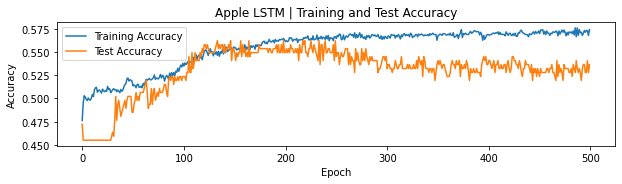

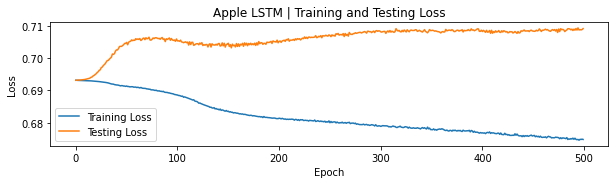

In [15]:
makePlots("Apple LSTM" , applHist)

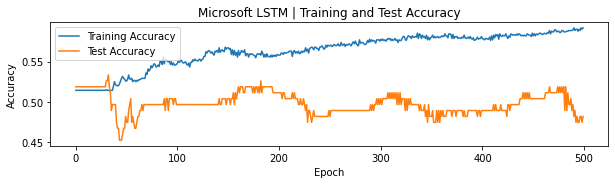

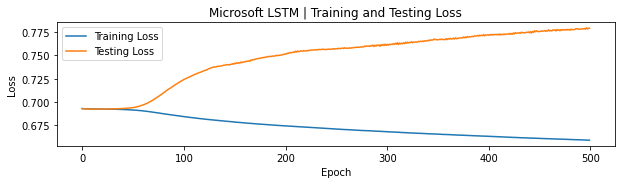

In [16]:
makePlots("Microsoft LSTM" , msftHist)

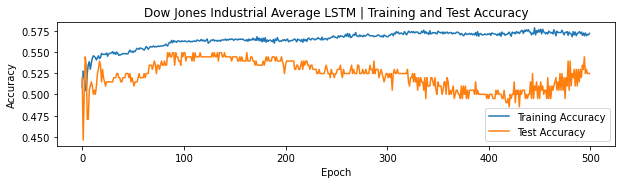

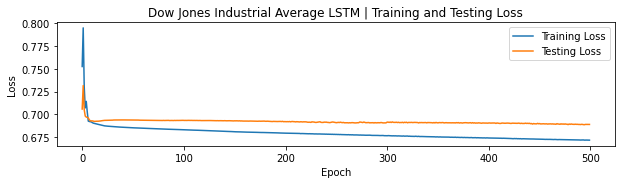

In [17]:
makePlots("Dow Jones Industrial Average LSTM" , djiaHist)

## Bidirectional LSTM

In [18]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

def makeBidirectionalLSTM(xTrain):
    model = Sequential()
    
    model.add (Bidirectional(LSTM(units =128 , activation = 'relu', return_sequences=True),
                             input_shape=(xTrain.shape[1], xTrain.shape[2])))
    
#     model.add(Dropout(0.25))

    model.add (Bidirectional(LSTM(units = 64, activation = 'relu', return_sequences=True)))
    
#     model.add(Dropout(0.25))

    model.add (TimeDistributed(Dense (units = 1, activation = 'sigmoid')))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model

### Make Bidirectional LSTM for Each Set

In [19]:
applBiLSTM = makeBidirectionalLSTM(xTrainAppl)
msftBiLSTM = makeBidirectionalLSTM(xTrainMsft)
djiaBiLSTM = makeBidirectionalLSTM(xTrainDjia)

### Fit Model for Each Set

In [20]:
applBiHist = applBiLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftBiHist = msftBiLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)
djiaBiHist = djiaBiLSTM.fit(xTrainDjia, yTrainDjia, batch_size = 72, validation_data=(xTestDjia, yTestDjia), epochs = 500, shuffle=False)

Epoch 1/500
30/30 [==============================] - 0s 16ms/step - loss: 0.6933 - accuracy: 0.4732 - val_loss: 0.6933 - val_accuracy: 0.4549
Epoch 2/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6933 - val_accuracy: 0.4850
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5062 - val_loss: 0.6934 - val_accuracy: 0.4893
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5091 - val_loss: 0.6935 - val_accuracy: 0.4678
Epoch 5/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5081 - val_loss: 0.6936 - val_accuracy: 0.4764
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5120 - val_loss: 0.6938 - val_accuracy: 0.4807
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5120 - val_loss: 0.6942 - val_accuracy: 0.4979
Epoch 8/500


Epoch 59/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5402 - val_loss: 0.7141 - val_accuracy: 0.5021
Epoch 60/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5435 - val_loss: 0.7134 - val_accuracy: 0.5193
Epoch 61/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5431 - val_loss: 0.7139 - val_accuracy: 0.5408
Epoch 62/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.5421 - val_loss: 0.7146 - val_accuracy: 0.5322
Epoch 63/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5450 - val_loss: 0.7146 - val_accuracy: 0.5408
Epoch 64/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5459 - val_loss: 0.7146 - val_accuracy: 0.5322
Epoch 65/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.5440 - val_loss: 0.7150 - val_accuracy: 0.5451
Epoch 

30/30 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.5699 - val_loss: 0.7247 - val_accuracy: 0.5064
Epoch 117/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5684 - val_loss: 0.7237 - val_accuracy: 0.5107
Epoch 118/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.5641 - val_loss: 0.7248 - val_accuracy: 0.5107
Epoch 119/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5679 - val_loss: 0.7242 - val_accuracy: 0.5107
Epoch 120/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.5660 - val_loss: 0.7246 - val_accuracy: 0.5064
Epoch 121/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5646 - val_loss: 0.7255 - val_accuracy: 0.5150
Epoch 122/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6727 - accuracy: 0.5656 - val_loss: 0.7268 - val_accuracy: 0.5064
Epoch 123/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.5813 - val_loss: 0.7395 - val_accuracy: 0.4936
Epoch 174/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.5804 - val_loss: 0.7393 - val_accuracy: 0.4936
Epoch 175/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.5847 - val_loss: 0.7381 - val_accuracy: 0.5021
Epoch 176/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.5842 - val_loss: 0.7404 - val_accuracy: 0.4979
Epoch 177/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.5818 - val_loss: 0.7390 - val_accuracy: 0.5021
Epoch 178/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.5818 - val_loss: 0.7406 - val_accuracy: 0.4936
Epoch 179/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.5813 - val_loss: 0.7402 - val_accuracy: 0.5021
Epoch 180/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.5833 - val_loss: 0.7499 - val_accuracy: 0.5064
Epoch 231/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.5871 - val_loss: 0.7502 - val_accuracy: 0.5193
Epoch 232/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.5871 - val_loss: 0.7499 - val_accuracy: 0.5021
Epoch 233/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.5895 - val_loss: 0.7510 - val_accuracy: 0.5064
Epoch 234/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.5861 - val_loss: 0.7498 - val_accuracy: 0.5107
Epoch 235/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.5890 - val_loss: 0.7512 - val_accuracy: 0.4936
Epoch 236/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.5861 - val_loss: 0.7517 - val_accuracy: 0.4850
Epoch 237/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.5971 - val_loss: 0.7603 - val_accuracy: 0.5279
Epoch 288/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.5976 - val_loss: 0.7643 - val_accuracy: 0.5193
Epoch 289/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5943 - val_loss: 0.7612 - val_accuracy: 0.5236
Epoch 290/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.6000 - val_loss: 0.7636 - val_accuracy: 0.5107
Epoch 291/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.5981 - val_loss: 0.7626 - val_accuracy: 0.5064
Epoch 292/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.5976 - val_loss: 0.7647 - val_accuracy: 0.5021
Epoch 293/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6526 - accuracy: 0.5967 - val_loss: 0.7646 - val_accuracy: 0.5021
Epoch 294/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.6048 - val_loss: 0.7783 - val_accuracy: 0.4979
Epoch 345/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6072 - val_loss: 0.7736 - val_accuracy: 0.4807
Epoch 346/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.6062 - val_loss: 0.7749 - val_accuracy: 0.5021
Epoch 347/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.6105 - val_loss: 0.7775 - val_accuracy: 0.4850
Epoch 348/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.6077 - val_loss: 0.7765 - val_accuracy: 0.4850
Epoch 349/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6115 - val_loss: 0.7782 - val_accuracy: 0.4678
Epoch 350/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6480 - accuracy: 0.6115 - val_loss: 0.7774 - val_accuracy: 0.4764
Epoch 351/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.6148 - val_loss: 0.7846 - val_accuracy: 0.4678
Epoch 402/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.6086 - val_loss: 0.7852 - val_accuracy: 0.4635
Epoch 403/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.6134 - val_loss: 0.7860 - val_accuracy: 0.4721
Epoch 404/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.6139 - val_loss: 0.7861 - val_accuracy: 0.4678
Epoch 405/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.6144 - val_loss: 0.7864 - val_accuracy: 0.4549
Epoch 406/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.6158 - val_loss: 0.7882 - val_accuracy: 0.4506
Epoch 407/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.6182 - val_loss: 0.7874 - val_accuracy: 0.4592
Epoch 408/500

30/30 [==============================] - 0s 4ms/step - loss: 0.6422 - accuracy: 0.6144 - val_loss: 0.7898 - val_accuracy: 0.4635
Epoch 459/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.6201 - val_loss: 0.7865 - val_accuracy: 0.4421
Epoch 460/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6376 - accuracy: 0.6234 - val_loss: 0.7908 - val_accuracy: 0.4635
Epoch 461/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.6167 - val_loss: 0.7906 - val_accuracy: 0.4592
Epoch 462/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.6215 - val_loss: 0.7862 - val_accuracy: 0.4592
Epoch 463/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.6191 - val_loss: 0.7916 - val_accuracy: 0.4464
Epoch 464/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.6191 - val_loss: 0.7896 - val_accuracy: 0.4592
Epoch 465/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5141 - val_loss: 0.6925 - val_accuracy: 0.5259
Epoch 16/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5133 - val_loss: 0.6926 - val_accuracy: 0.5259
Epoch 17/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5166 - val_loss: 0.6926 - val_accuracy: 0.5111
Epoch 18/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5207 - val_loss: 0.6927 - val_accuracy: 0.4963
Epoch 19/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5174 - val_loss: 0.6928 - val_accuracy: 0.4889
Epoch 20/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5249 - val_loss: 0.6929 - val_accuracy: 0.4889
Epoch 21/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5249 - val_loss: 0.6930 - val_accuracy: 0.4593
Epoch 22/500
17/17 

Epoch 73/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.5655 - val_loss: 0.7245 - val_accuracy: 0.4963
Epoch 74/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5705 - val_loss: 0.7231 - val_accuracy: 0.5037
Epoch 75/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.5738 - val_loss: 0.7231 - val_accuracy: 0.5037
Epoch 76/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.5672 - val_loss: 0.7251 - val_accuracy: 0.4963
Epoch 77/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.5713 - val_loss: 0.7222 - val_accuracy: 0.4963
Epoch 78/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.5771 - val_loss: 0.7232 - val_accuracy: 0.4963
Epoch 79/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5721 - val_loss: 0.7246 - val_accuracy: 0.4963
Epoch 

17/17 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.5896 - val_loss: 0.8087 - val_accuracy: 0.4963
Epoch 131/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6563 - accuracy: 0.5962 - val_loss: 0.8103 - val_accuracy: 0.4963
Epoch 132/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.5920 - val_loss: 0.8098 - val_accuracy: 0.4963
Epoch 133/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6557 - accuracy: 0.5929 - val_loss: 0.8093 - val_accuracy: 0.5111
Epoch 134/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.5937 - val_loss: 0.8179 - val_accuracy: 0.4963
Epoch 135/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.5987 - val_loss: 0.8120 - val_accuracy: 0.5037
Epoch 136/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.5970 - val_loss: 0.8162 - val_accuracy: 0.5037
Epoch 137/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.6128 - val_loss: 0.9175 - val_accuracy: 0.5111
Epoch 188/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6425 - accuracy: 0.6144 - val_loss: 0.9138 - val_accuracy: 0.4889
Epoch 189/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6412 - accuracy: 0.6186 - val_loss: 0.9280 - val_accuracy: 0.4963
Epoch 190/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6422 - accuracy: 0.6144 - val_loss: 0.9290 - val_accuracy: 0.4963
Epoch 191/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6408 - accuracy: 0.6219 - val_loss: 0.9260 - val_accuracy: 0.5111
Epoch 192/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.6144 - val_loss: 0.9184 - val_accuracy: 0.4889
Epoch 193/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6400 - accuracy: 0.6219 - val_loss: 0.9341 - val_accuracy: 0.5037
Epoch 194/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6297 - accuracy: 0.6202 - val_loss: 1.0174 - val_accuracy: 0.5185
Epoch 245/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6290 - accuracy: 0.6235 - val_loss: 1.0175 - val_accuracy: 0.5111
Epoch 246/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6288 - accuracy: 0.6269 - val_loss: 1.0309 - val_accuracy: 0.5037
Epoch 247/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6287 - accuracy: 0.6244 - val_loss: 1.0257 - val_accuracy: 0.5185
Epoch 248/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6283 - accuracy: 0.6294 - val_loss: 1.0298 - val_accuracy: 0.5111
Epoch 249/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6280 - accuracy: 0.6252 - val_loss: 1.0286 - val_accuracy: 0.5185
Epoch 250/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6288 - accuracy: 0.6285 - val_loss: 1.0322 - val_accuracy: 0.5111
Epoch 251/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6285 - accuracy: 0.6219 - val_loss: 1.0681 - val_accuracy: 0.4889
Epoch 302/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6223 - accuracy: 0.6277 - val_loss: 1.0932 - val_accuracy: 0.5185
Epoch 303/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6249 - accuracy: 0.6294 - val_loss: 1.0705 - val_accuracy: 0.5111
Epoch 304/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.6285 - val_loss: 1.0926 - val_accuracy: 0.5111
Epoch 305/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6226 - accuracy: 0.6335 - val_loss: 1.0795 - val_accuracy: 0.5185
Epoch 306/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6192 - accuracy: 0.6302 - val_loss: 1.0874 - val_accuracy: 0.5111
Epoch 307/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6208 - accuracy: 0.6343 - val_loss: 1.1104 - val_accuracy: 0.5111
Epoch 308/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6102 - accuracy: 0.6401 - val_loss: 1.1645 - val_accuracy: 0.5111
Epoch 359/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6109 - accuracy: 0.6343 - val_loss: 1.1833 - val_accuracy: 0.5037
Epoch 360/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.6426 - val_loss: 1.1585 - val_accuracy: 0.5111
Epoch 361/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6114 - accuracy: 0.6385 - val_loss: 1.1855 - val_accuracy: 0.4963
Epoch 362/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6103 - accuracy: 0.6360 - val_loss: 1.1746 - val_accuracy: 0.5037
Epoch 363/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.6352 - val_loss: 1.1682 - val_accuracy: 0.4963
Epoch 364/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6114 - accuracy: 0.6401 - val_loss: 1.1790 - val_accuracy: 0.5037
Epoch 365/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6063 - accuracy: 0.6385 - val_loss: 1.2160 - val_accuracy: 0.5037
Epoch 416/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6102 - accuracy: 0.6468 - val_loss: 1.2412 - val_accuracy: 0.4963
Epoch 417/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6098 - accuracy: 0.6385 - val_loss: 1.2204 - val_accuracy: 0.5037
Epoch 418/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6116 - accuracy: 0.6376 - val_loss: 1.2289 - val_accuracy: 0.4889
Epoch 419/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6074 - accuracy: 0.6434 - val_loss: 1.2300 - val_accuracy: 0.5037
Epoch 420/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6094 - accuracy: 0.6468 - val_loss: 1.2388 - val_accuracy: 0.4963
Epoch 421/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6059 - accuracy: 0.6426 - val_loss: 1.2270 - val_accuracy: 0.5037
Epoch 422/500

17/17 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.6526 - val_loss: 1.3260 - val_accuracy: 0.4889
Epoch 473/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.6551 - val_loss: 1.3043 - val_accuracy: 0.4889
Epoch 474/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.6534 - val_loss: 1.3300 - val_accuracy: 0.4963
Epoch 475/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5957 - accuracy: 0.6584 - val_loss: 1.2759 - val_accuracy: 0.4815
Epoch 476/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5941 - accuracy: 0.6617 - val_loss: 1.3577 - val_accuracy: 0.5037
Epoch 477/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.6542 - val_loss: 1.3012 - val_accuracy: 0.4889
Epoch 478/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5974 - accuracy: 0.6625 - val_loss: 1.3622 - val_accuracy: 0.5037
Epoch 479/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5443 - val_loss: 0.6941 - val_accuracy: 0.4755
Epoch 30/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5432 - val_loss: 0.6943 - val_accuracy: 0.4755
Epoch 31/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5432 - val_loss: 0.6945 - val_accuracy: 0.4804
Epoch 32/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5443 - val_loss: 0.6947 - val_accuracy: 0.4853
Epoch 33/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5421 - val_loss: 0.6949 - val_accuracy: 0.4902
Epoch 34/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5438 - val_loss: 0.6950 - val_accuracy: 0.4902
Epoch 35/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5432 - val_loss: 0.6951 - val_accuracy: 0.4853
Epoch 36/500
26/26 

Epoch 87/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.5656 - val_loss: 0.6953 - val_accuracy: 0.4951
Epoch 88/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5673 - val_loss: 0.6953 - val_accuracy: 0.4902
Epoch 89/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5678 - val_loss: 0.6949 - val_accuracy: 0.5049
Epoch 90/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.5689 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 91/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.5667 - val_loss: 0.6953 - val_accuracy: 0.4951
Epoch 92/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5673 - val_loss: 0.6948 - val_accuracy: 0.5049
Epoch 93/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.5678 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 

26/26 [==============================] - 0s 4ms/step - loss: 0.6737 - accuracy: 0.5810 - val_loss: 0.6937 - val_accuracy: 0.5098
Epoch 145/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.5771 - val_loss: 0.6930 - val_accuracy: 0.4951
Epoch 146/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.5804 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 147/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.5771 - val_loss: 0.6929 - val_accuracy: 0.5098
Epoch 148/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.5804 - val_loss: 0.6934 - val_accuracy: 0.5049
Epoch 149/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.5804 - val_loss: 0.6945 - val_accuracy: 0.5049
Epoch 150/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.5832 - val_loss: 0.6934 - val_accuracy: 0.5049
Epoch 151/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.5821 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 202/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.5826 - val_loss: 0.6938 - val_accuracy: 0.4951
Epoch 203/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6666 - accuracy: 0.5853 - val_loss: 0.6932 - val_accuracy: 0.5098
Epoch 204/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.5837 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 205/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.5832 - val_loss: 0.6921 - val_accuracy: 0.5049
Epoch 206/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.5853 - val_loss: 0.6931 - val_accuracy: 0.5049
Epoch 207/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6658 - accuracy: 0.5875 - val_loss: 0.6925 - val_accuracy: 0.5049
Epoch 208/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.5941 - val_loss: 0.6916 - val_accuracy: 0.5147
Epoch 259/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.5848 - val_loss: 0.6934 - val_accuracy: 0.4951
Epoch 260/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.5946 - val_loss: 0.6927 - val_accuracy: 0.5049
Epoch 261/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6597 - accuracy: 0.5903 - val_loss: 0.6939 - val_accuracy: 0.5098
Epoch 262/500
26/26 [==============================] - 0s 5ms/step - loss: 0.6596 - accuracy: 0.5952 - val_loss: 0.6915 - val_accuracy: 0.5049
Epoch 263/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6598 - accuracy: 0.5897 - val_loss: 0.6941 - val_accuracy: 0.5049
Epoch 264/500
26/26 [==============================] - 0s 5ms/step - loss: 0.6597 - accuracy: 0.5925 - val_loss: 0.6924 - val_accuracy: 0.5049
Epoch 265/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.5985 - val_loss: 0.6915 - val_accuracy: 0.5147
Epoch 316/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6544 - accuracy: 0.5935 - val_loss: 0.6938 - val_accuracy: 0.5049
Epoch 317/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.5974 - val_loss: 0.6905 - val_accuracy: 0.5196
Epoch 318/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.5979 - val_loss: 0.6913 - val_accuracy: 0.5098
Epoch 319/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.5946 - val_loss: 0.6901 - val_accuracy: 0.5196
Epoch 320/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6533 - accuracy: 0.5990 - val_loss: 0.6922 - val_accuracy: 0.5098
Epoch 321/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.5935 - val_loss: 0.6917 - val_accuracy: 0.5196
Epoch 322/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.6105 - val_loss: 0.6957 - val_accuracy: 0.5147
Epoch 373/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6486 - accuracy: 0.5957 - val_loss: 0.6898 - val_accuracy: 0.5539
Epoch 374/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.6061 - val_loss: 0.6923 - val_accuracy: 0.5343
Epoch 375/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6018 - val_loss: 0.6911 - val_accuracy: 0.5294
Epoch 376/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6470 - accuracy: 0.6089 - val_loss: 0.6941 - val_accuracy: 0.5294
Epoch 377/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.6039 - val_loss: 0.6916 - val_accuracy: 0.5392
Epoch 378/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6469 - accuracy: 0.6121 - val_loss: 0.6948 - val_accuracy: 0.5196
Epoch 379/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6420 - accuracy: 0.6132 - val_loss: 0.6924 - val_accuracy: 0.5343
Epoch 430/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6411 - accuracy: 0.6121 - val_loss: 0.6963 - val_accuracy: 0.5539
Epoch 431/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6422 - accuracy: 0.6116 - val_loss: 0.6916 - val_accuracy: 0.5490
Epoch 432/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6420 - accuracy: 0.6193 - val_loss: 0.6975 - val_accuracy: 0.5441
Epoch 433/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.6138 - val_loss: 0.6926 - val_accuracy: 0.5490
Epoch 434/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6423 - accuracy: 0.6154 - val_loss: 0.6952 - val_accuracy: 0.5539
Epoch 435/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.6072 - val_loss: 0.6943 - val_accuracy: 0.5588
Epoch 436/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6361 - accuracy: 0.6160 - val_loss: 0.6937 - val_accuracy: 0.5588
Epoch 487/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6363 - accuracy: 0.6171 - val_loss: 0.7018 - val_accuracy: 0.5392
Epoch 488/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6366 - accuracy: 0.6143 - val_loss: 0.6970 - val_accuracy: 0.5392
Epoch 489/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6363 - accuracy: 0.6193 - val_loss: 0.7024 - val_accuracy: 0.5441
Epoch 490/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6370 - accuracy: 0.6132 - val_loss: 0.6967 - val_accuracy: 0.5490
Epoch 491/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6365 - accuracy: 0.6204 - val_loss: 0.7001 - val_accuracy: 0.5392
Epoch 492/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6392 - accuracy: 0.6111 - val_loss: 0.6965 - val_accuracy: 0.5588
Epoch 493/500

### Make Plots to Evaluate Each Model

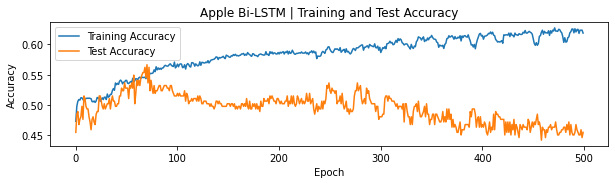

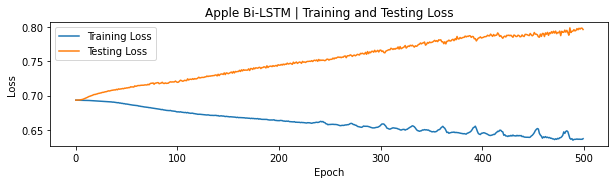

In [21]:
makePlots("Apple Bi-LSTM" , applBiHist)

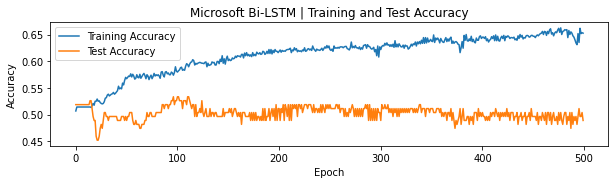

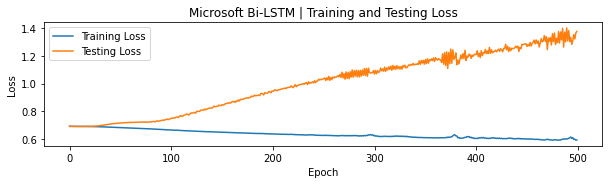

In [22]:
makePlots("Microsoft Bi-LSTM" , msftBiHist)

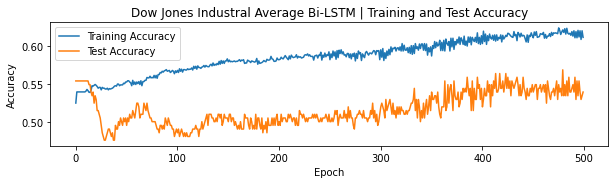

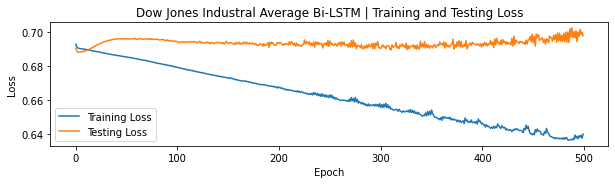

In [23]:
makePlots("Dow Jones Industral Average Bi-LSTM" , djiaBiHist)